# Xpand IT DS Challenge

This notebook contains the template you should use to present your code, results and conclusions. You should keep the main structure intact to make it easier to evaluate and compare in the end.

## Dataset
You can find the dataset in the data folder of the repository. The folder contains two files:
* dow_jones_index.data - dataset data
* dow_jones_index.names - dataset information and details

## Business Analysis
Here you should conduct a brief analysis of what is Dow Jones Index. You can enumerate the main topics to take into account based on the dataset provided as well as your understandings of the variables.


-----
*Add here your business analysis conclusions (max. 200 words)*

-----

The Dow Jones [Industrial] Index (DJIA) is a stock market index founded in February 16, 1885, as DJA, and renamed to DJIA in May 26, 1896. Nowadays, the index comprises 30 blue chip companies listed on the New York stock exchange and the Nasdaq. These companies operate on industries ranging from information technology or financial services to retailing or food industry, to name a few. The largest index weight is held by UnitedHealth Group, at 8.81%, followed closely by Microsoft and Goldman Sachs at 6.83% and 6.54%, respectively. It also includes other internationally recognised companies, such as Apple, McDonald's and Visa, for instance.

Unlike other common indexes, the Dow Jones Index is price-weighted, as opposed to being weighted by market capitalisation. As such, stocks with higher share prices have a greater influence. The DJIA is calculated by dividing the sum of the prices of all component stocks, $\sum p$, by the Dow Divisor, $d$. As of February 2024, the Dow Divisor was set at 0.15265312230608.

The Dow Jones Index is reevaluated on a regular basis, replacing companies that no longer meet the eligibility criteria.



## Data Understanding
During the data understanding phase, you should focus on understanding what each variable represents, compute statistics and visualizations. Some questions that may guide your work follow:
* Feature engineering: should new features be created from the existing ones?
* What will be your features and your label?
* Is the dataset ready for the prediction task? (ex: missing values)
* How will the data be split into train and test sets?

-----

#### Imports

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Load data

In [2]:
#read data/dow_jones_index.names
with open('data/dow_jones_index.names') as f:
    print(f.read())

This dataset was first used in:
Brown, M. S., Pelosi, M. & Dirska, H. (2013). Dynamic-radius Species-conserving Genetic Algorithm for 
the Financial Forecasting of Dow Jones Index Stocks. Machine Learning and Data Mining in Pattern 
Recognition, 7988, 27-41.

Number of Instances
There are 750 data records.  360 are from the first quarter of the year (Jan to Mar)
390 are from the second quarter of the year (Apr to Jun).

Number of Attributes
There are 16 attributes. 

For each Attribute
	quarter:  the yearly quarter (1=Jan-Mar; 2=Apr-Jun)
	stock: the stock symbol (see below)
	date: the last business day of the work (this is typically a Friday)
	open: the price of the stock at the beginning of the week
	high: the highest price of the stock during the week
	low: the lowest price of the stock during the week
	close: the price of the stock at the end of the week
	volume: the number of shares of stock that traded hands in the week
	percent_change_price: the percentage change in price through

In [3]:
#read data/dow_jones_index.data
data = pd.read_csv('data/dow_jones_index.data')
data.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


#### Check data types

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   date                                750 non-null    object 
 3   open                                750 non-null    object 
 4   high                                750 non-null    object 
 5   low                                 750 non-null    object 
 6   close                               750 non-null    object 
 7   volume                              750 non-null    int64  
 8   percent_change_price                750 non-null    float64
 9   percent_change_volume_over_last_wk  720 non-null    float64
 10  previous_weeks_volume               720 non-null    float64
 11  next_weeks_open                     750 non-n

In [6]:
price_columns = ['open', 'high', 'low', 'close', 'next_weeks_open', 'next_weeks_close']
data[price_columns] = data[price_columns].replace('[\$,]', '', regex=True).astype(float)

Basic statistics

In [7]:
data.describe()

,quarter,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
count,750.000000,750.000000,750.000000,750.000000,750.000000,7.500000e+02,750.000000,720.000000,7.200000e+02,750.000000,750.000000,750.000000,750.000000,750.000000
mean,1.520000,53.651840,54.669987,52.640160,53.729267,1.175478e+08,0.050262,5.593627,1.173876e+08,53.702440,53.889080,0.238468,52.525333,0.691826
std,0.499933,32.638852,33.215994,32.119277,32.788787,1.584381e+08,2.517809,40.543478,1.592322e+08,32.778111,33.016677,2.679538,46.335098,0.305482
min,1.000000,10.590000,10.940000,10.400000,10.520000,9.718851e+06,-15.422900,-61.433175,9.718851e+06,10.520000,10.520000,-15.422900,0.000000,0.065574
25%,1.000000,29.830000,30.627500,28.720000,30.365000,3.086624e+07,-1.288053,-19.804284,3.067832e+07,30.315000,30.462500,-1.222068,24.000000,0.534549
50%,2.000000,45.970000,46.885000,44.800000,45.930000,5.306088e+07,0.000000,0.512586,5.294556e+07,46.015000,46.125000,0.101193,47.000000,0.681067
75%,2.000000,72.715000,74.287500,71.037500,72.667500,1.327218e+08,1.650888,21.800622,1.333230e+08,72.715000,72.915000,1.845562,69.000000,0.854291
max,2.000000,172.110000,173.540000,167.820000,170.580000,1.453439e+09,9.882230,327.408924,1.453439e+09,172.110000,174.540000,9.882230,336.000000,1.564210


In [8]:
data['date'] = pd.to_datetime(data['date'])

check for missing values

In [9]:
data.isnull().sum()

quarter                                0
stock                                  0
date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
percent_change_next_weeks_price        0
days_to_next_dividend                  0
percent_return_next_dividend           0
dtype: int64

drop rows with missing values

In [10]:

data = data.dropna()

find all date unique values

In [11]:

data['date'].unique()

<DatetimeArray>
['2011-01-14 00:00:00', '2011-01-21 00:00:00', '2011-01-28 00:00:00',
 '2011-02-04 00:00:00', '2011-02-11 00:00:00', '2011-02-18 00:00:00',
 '2011-02-25 00:00:00', '2011-03-04 00:00:00', '2011-03-11 00:00:00',
 '2011-03-18 00:00:00', '2011-03-25 00:00:00', '2011-04-01 00:00:00',
 '2011-04-08 00:00:00', '2011-04-15 00:00:00', '2011-04-21 00:00:00',
 '2011-04-29 00:00:00', '2011-05-06 00:00:00', '2011-05-13 00:00:00',
 '2011-05-20 00:00:00', '2011-05-27 00:00:00', '2011-06-03 00:00:00',
 '2011-06-10 00:00:00', '2011-06-17 00:00:00', '2011-06-24 00:00:00']
Length: 24, dtype: datetime64[ns]

For each day, find the maximum value in percent_change_price, and the corresponding stock. Assign 1 to the stock with the maximum value, and 0 to the others in a new column called 'best_stock'

In [23]:
data['best_stock'] = data.groupby('date')['percent_change_next_weeks_price'].transform('max') == data['percent_change_next_weeks_price']

evolution of percent_change_price for each stock

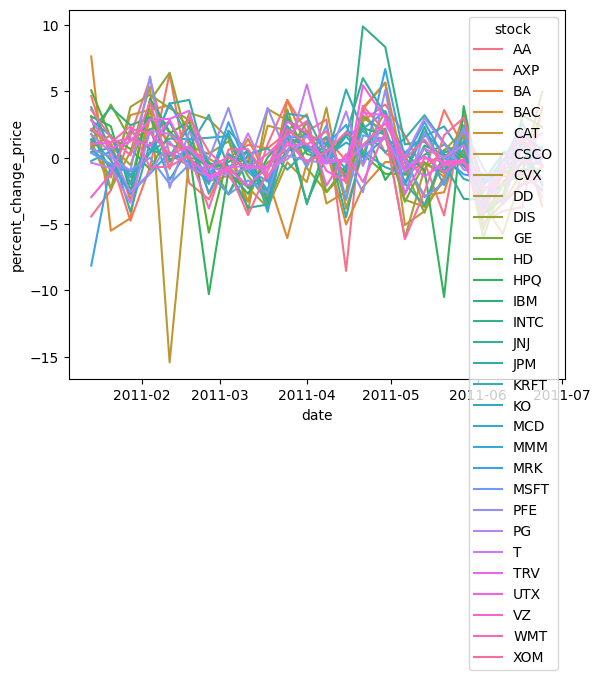

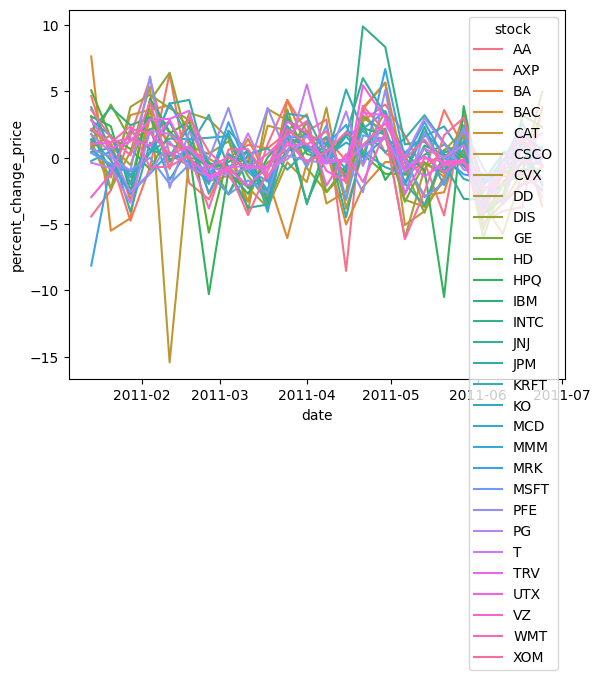

In [15]:

sns.lineplot(data=data, x='date', y='percent_change_price', hue='stock')
plt.show()


correlation between all columns except date and stock

<Axes: >

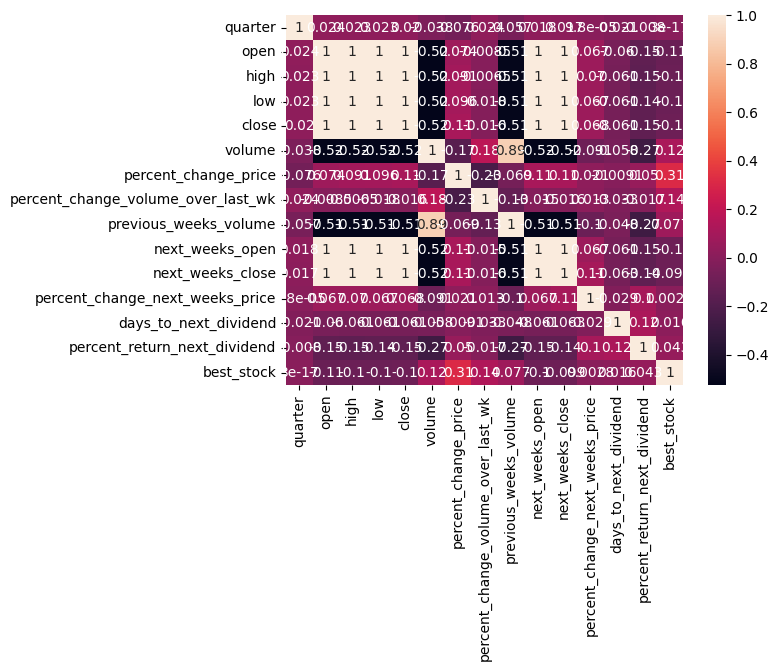

In [17]:


corr = data.drop(columns=['date', 'stock']).corr()
sns.heatmap(corr, annot=True)

In [ ]:
data[data['date'] == '2011-01-28']

In [ ]:
#one hot encode stock column
data = pd.get_dummies(data, columns=['stock'])
data.head()

In [ ]:
#check if all sto

In [ ]:
#one hot decode stock column
data['stock'] = data.filter(like='stock_').idxmax(1)

In [ ]:
data.head()

-----
*Add here your data understanding findings and conclusions (max. 200 words)*

-----

## Modelling
In this phase, your main goal is to develop and describe your approach to the solution of the problem. Some guidelines to help you:
* What metrics will you use to evaluate your solutions?
* What are some algorithms that can lead to good results? And why?
* Describe in detail your thought process during the development of your solution.
* Present your results.


-----


In [18]:
#add here your modelling code
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [19]:
data.columns

Index(['quarter', 'stock', 'date', 'open', 'high', 'low', 'close', 'volume',
       'percent_change_price', 'percent_change_volume_over_last_wk',
       'previous_weeks_volume', 'next_weeks_open', 'next_weeks_close',
       'percent_change_next_weeks_price', 'days_to_next_dividend',
       'percent_return_next_dividend', 'best_stock'],
      dtype='object')

In [24]:
features = ['percent_change_price', 'previous_weeks_volume', 'days_to_next_dividend', 'percent_return_next_dividend']
label = 'best_stock'
X = data[features]
y = data[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.96      0.99      0.98       138
        True       0.00      0.00      0.00         6

    accuracy                           0.95       144
   macro avg       0.48      0.50      0.49       144
weighted avg       0.92      0.95      0.93       144



In [26]:
accuracy_score(y_test, y_pred)

0.9513888888888888

-----
*Add here your modelling results and conclusions (max. 200 words)*

-----

## Conclusions
In the conclusions, you should enumerate the results you got after completing the challenge.
* How good do you consider your results? 
* What are some factors that would contribute to get better results?
* What are some advantages and disadvantages of your solution?
* What can be done as future work to improve your results?


-----
*Add here your final conclusions (max. 400 words)*

-----

#### Feedback

-----
*Add here your thoughts and feedback regarding this challenge.*

-----

To submit your solution you should e-mail us this notebook in response to the e-mail you initially received with the challenge.